[0.60441425 0.53940027 0.58628556]
0.7864991162232562
[3.625 3.5   3.25 ]


(<Figure size 640x480 with 1 Axes>, <Axes3DSubplot:>)

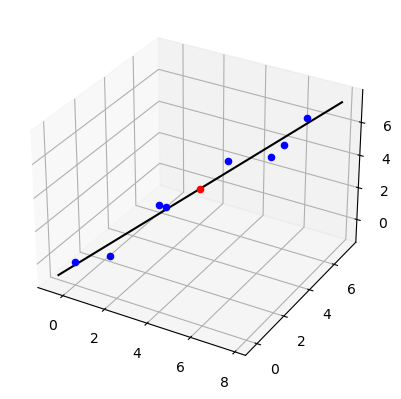

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skspatial.objects import Line, Points
from skspatial.plotting import plot_3d


points = Points(
    [
        [0, 0, 0],
        [1, 1, 0],
        [2, 3, 2],
        [3, 2, 3],
        [4, 5, 4],
        [6, 5, 5],
        [6, 6, 5],
        [7, 6, 7],
    ],
)

line_fit = Line.best_fit(points)
print(line_fit.direction)
print(line_fit.sum_squares(np.array([[1,1,0],[2,3,2]])))
print(line_fit.point)
plot_3d(
    line_fit.plotter(t_1=-7, t_2=7, c='k'),
    points.plotter(c='b', depthshade=False),
    line_fit.point.plotter(c='r', depthshade=False),
)

4.887


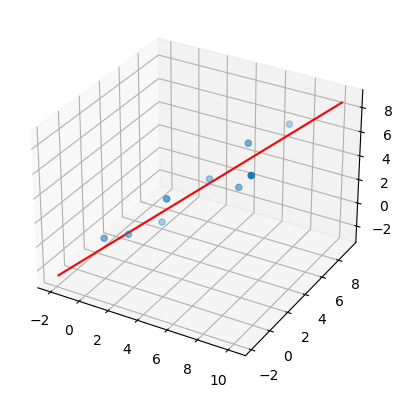

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skspatial.objects import Line, Points
from skspatial.plotting import plot_3d


punti = np.array(
    [
        [0, 0, 0],
        [1, 1, 0],
        [2, 3, 0],
        [3, 2, 3],
        [4, 5, 3],
        [6, 5, 3],
        [6, 6, 6],
        [7, 9, 6],
        [8, 3, 6]
    ],
)

fit = Line.best_fit(punti)
s = fit.direction
i = fit.point
print(np.sqrt(fit.sum_squares(punti)).round(3))


t = np.linspace(-10,10,100)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(punti[:,0], punti[:,1], punti[:,2])
ax.plot(t*s[0]+i[0], t*s[1]+i[1], t*s[2]+i[2], c='r')
plt.show()

[[[0 0 0]
  [2 1 0]
  [5 4 0]
  [8 6 0]]

 [[3 3 3]
  [7 2 3]
  [1 8 3]
  [1 3 3]]

 [[6 6 6]
  [7 7 6]
  [6 9 6]
  [1 5 6]]] 

[[0 0 0]
 [2 1 0]
 [5 4 0]
 [8 6 0]
 [3 3 3]
 [7 2 3]
 [1 8 3]
 [1 3 3]
 [6 6 6]
 [7 7 6]
 [6 9 6]
 [1 5 6]] 

9.911
[0.53214798 0.67724711 0.50808944]
[3.91666667 4.5        3.        ]


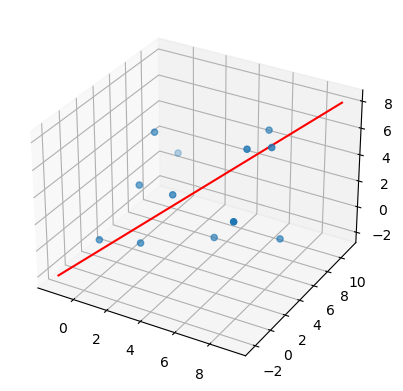

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from skspatial.objects import Line, Points
from skspatial.plotting import plot_3d

det1 = np.array([[0,0,0],[2,1,0],[5,4,0],[8,6,0]])
det2 = np.array([[3,3,3],[7,2,3],[1,8,3],[1,3,3]])
det3 = np.array([[6,6,6],[7,7,6],[6,9,6],[1,5,6]])
before = np.array([det1, det2, det3])
print(before, '\n')


punti = np.vstack((before[0,:,:], det2, det3))
print(punti, '\n')

fit = Line.best_fit(np.vstack((det1, det2, det3)))
s = fit.direction
i = fit.point
print(np.sqrt(fit.sum_squares(punti)).round(3))
print(s)
print(i)

t = np.linspace(-10,10,100)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(punti[:,0], punti[:,1], punti[:,2])
ax.plot(t*s[0]+i[0], t*s[1]+i[1], t*s[2]+i[2], c='r')
plt.show()

[[[0 0 0]
  [2 1 0]
  [5 4 0]
  [8 6 0]]

 [[3 3 3]
  [7 2 3]
  [1 8 3]
  [1 3 3]]

 [[6 6 6]
  [7 7 6]
  [6 9 6]
  [1 5 6]]] 

Best slope is: [0.577 0.577 0.577] 

Line passes for: [3. 3. 3.] 

Best err is: 0.0 

With points: [0 0 0] [3 3 3] [6 6 6] 



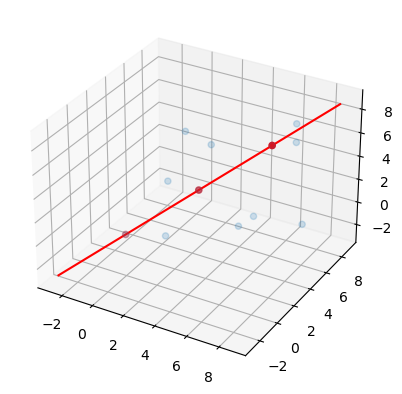

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skspatial.objects import Line, Points
from skspatial.plotting import plot_3d

det1 = np.array([[0,0,0],[2,1,0],[5,4,0],[8,6,0]])
det2 = np.array([[3,3,3],[7,2,3],[1,8,3],[1,3,3]])
det3 = np.array([[6,6,6],[7,7,6],[6,9,6],[1,5,6]])
before = np.array([det1, det2, det3])
points = np.vstack((before[0,:,:], before[1,:,:], before[2,:,:]))
print(before, '\n')

t = np.linspace(-10,10,100)


d1, d2, d3 = 0, 0, 0
err = 200
s = np.zeros(3)
p = np.zeros(3)


for i in range(before.shape[1]):
    for j in range(before.shape[1]):
            for k in range(before.shape[1]):
                retta = Line.best_fit(np.vstack((before[0,i,:], before[1,j,:], before[2,k,:])))
                if np.sqrt(retta.sum_squares([before[0,i,:], before[1,j,:], before[2,k,:]]))<err:
                    err = np.sqrt(retta.sum_squares([before[0,i,:], before[1,j,:], before[2,k,:]]))
                    d1, d2, d3 = i, j, k
                    s = retta.direction
                    p = retta.point
                    
                    
print('Best slope is:', s.round(3), '\n')
print('Line passes for:', p.round(3), '\n')
print('Best err is:', err.round(3), '\n')
print('With points:', before[0,d1,:], before[1,d2,:], before[2,d3,:], '\n')

p_f = np.vstack((before[0,d1,:], before[1,d2,:], before[2,d3,:]))

t = np.linspace(-10,10,100)

x = np.linspace(-2, 8, 10)
y = np.linspace(-2, 8, 10)
z = np.linspace(-2, 8, 10)
X, Y, Z = np.meshgrid(x, y, z)
P = np.array([X, Y, Z])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], alpha=0.2)
ax.scatter(p_f[:,0], p_f[:,1], p_f[:,2], c='r')
ax.plot(t*s[0]+p[0], t*s[1]+p[1], t*s[2]+p[2], c='r')

plt.show()